In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

## Herald

In [2]:
headers_1 = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
}


# 1 = herald
category = 'sport'
paper_name = 'herald'

business = 'https://www.herald.co.zw/category/articles/business/'
arts = 'https://www.herald.co.zw/category/articles/entertainment/'
sports = 'https://www.herald.co.zw/category/articles/sport/'
politics = 'https://www.herald.co.zw/category/articles/national/'

raw_urls = {
    'business' : business, 
    'arts': arts, 
    'sports': sports, 
    'politics': politics
}



def save_csv(cat, paper_name, link_list, heading_list, content_list):
    df = pd.DataFrame({
        'Link': link_list,
        'Title': heading_list,
        'Content': content_list
    })
    
    df.to_csv(f'data/{paper_name}_{cat}.csv', index=False)
    
    
def extract_from_herald_url(key, url, paper_name):
    page_1 = requests.get(url, headers = headers_1)
    soup_1 = BeautifulSoup(page_1.text, 'html.parser')

    ul_tags = soup_1.find_all('ul', 'nav')
    ul_tag = soup_1.find('div', {'class': 'post--items post--items-5 pd--30-0'}).find_all('li')

    link_list = []
    heading_list = []
    content_list = []
    for li_tag in ul_tag:
        try:
            link = ''
            heading = ''
            content = ''
            link = li_tag.find('a',  {'class': 'thumb'})['href']
            heading = li_tag.find('h3',  {'class': 'h4'}).get_text()
            content = ''
            print (link)
#             print (heading)

            individual_page = requests.get(str(link), headers = headers_1)
            individual_page_soup = BeautifulSoup(individual_page.text, 'html.parser')
            p_tags = individual_page_soup.find('div', {'class': 'post--content'}).find_all('p')
            for p_tag in p_tags:
                try:
                    content += p_tag.get_text() + ' '
                except: 
                    pass

            link_list.append(link)
            heading_list.append(heading)
            content_list.append(content)
#             print ('-------------------')
        except:
            pass
        
        
    print ("completed extraction")
    save_csv(str(key), paper_name, link_list, heading_list, content_list)
    
    


In [3]:
for key, value in raw_urls.items():
    extract_from_herald_url(key, value, paper_name)
    print (f"---------- completed extraction for {key} ---------------")

https://www.herald.co.zw/govt-to-ease-forex-exchange-challenges-through-agents/
https://www.herald.co.zw/nigerias-economic-future-looks-challenging-imf/
https://www.herald.co.zw/kenyan-stock-market-targets-higher-forex-inflows/
https://www.herald.co.zw/bad-weather-war-strain-the-worlds-wheat-supply/
https://www.herald.co.zw/zimre-strategy-still-anchored-on-creating-strong-cash-wallet/
https://www.herald.co.zw/govt-targets-350-000ha-under-irrigation-by-2025/
https://www.herald.co.zw/how-business-has-helped-pull-sa-back-from-the-brink/
https://www.herald.co.zw/trading-in-bindura-shares-halted-on-vfex/
https://www.herald.co.zw/african-sun-recovers-betters-pre-covid-era/
https://www.herald.co.zw/fbc-re-bounces-back-to-profitability/
https://www.herald.co.zw/egypt-in-crisis-as-us35bn-debt-piles-up/
https://www.herald.co.zw/imf-drc-reach-deal-on-us15bn-loan-review/
https://www.herald.co.zw/sa-vehicle-industry-achieves-r21bn-positive-trade-balance/
https://www.herald.co.zw/nigeria-denies-bina

In [4]:
politics_df = pd.read_csv('herald_politics.csv')
sports_df = pd.read_csv('herald_sports.csv')
arts_df = pd.read_csv('herald_arts.csv')
business_df = pd.read_csv('herald_business.csv')

In [5]:
politics_df.head()

,Link,Title,Content
0,https://www.herald.co.zw/zim-to-become-africas...,Zim to become Africa’s fertiliser production hub,"Zvamaida Murwira recently in NAIROBI, Kenya Zi..."
1,https://www.herald.co.zw/sa-e-passports-start-...,SA e-passports start this week,Blessings Chidakwa Herald Reporter Zimbabwe st...
2,https://www.herald.co.zw/vp-chiwenga-mourns-fa...,VP Chiwenga mourns farmer Swanepoel,Fidelis Munyoro Vice President Dr Constantino ...
3,https://www.herald.co.zw/govt-to-ease-forex-ex...,Govt to ease forex exchange challenges through...,Trust Freddy Herald Correspondent People shoul...
4,https://www.herald.co.zw/first-lady-brings-e-h...,First Lady brings e-health and e-commerce cent...,Blessings Chidakwa and Fungai Lupande First La...


In [6]:
sports_df.head()

,Link,Title,Content
0,https://www.herald.co.zw/chevrons-get-consolat...,Chevrons get consolation T20I win,Zimpapers Sports Hub ZIMBABWE’S over-reliance ...
1,https://www.herald.co.zw/hollick-crowned-fbc-z...,Hollick crowned FBC Zim Open champ,Eddie Chikamhi Senior Sports Reporter GOLFER M...
2,https://www.herald.co.zw/zdf-stamp-authority-i...,ZDF stamp authority in PNL,Tadious Manyepo Sports Reporter PREMIER Netbal...
3,https://www.herald.co.zw/fc-platinum-silence-b...,FC Platinum silence Bosso on homeground,Nkosilathi Sibanda in BULAWAYO Highlanders . ....
4,https://www.herald.co.zw/telone-fans-demand-ch...,TelOne fans demand Chikuni’s head,"Innocent Muchochomi, in GWERU TelOne . . . . ...."


In [7]:
arts_df.head()

,Link,Title,Content
0,https://www.herald.co.zw/castle-tankard-gives-...,Castle Tankard gives new stars stage to shine,"Arts Reporter Sungura ace, Alick Macheso, is s..."
1,https://www.herald.co.zw/the-unveiled-take-fan...,The Unveiled take fans to ‘The Next Level’ at ...,"Entertainment Editor Young, vibrant and smart ..."
2,https://www.herald.co.zw/cresta-mbare-the-last...,Cresta Mbare: The last supper,Talent Chimutambgi-Lifestyle Writer It is almo...
3,https://www.herald.co.zw/show-some-love-on-mot...,Show some love on Mother’s Day,Laina Makuzha-LOVE by DESIGN “Despite the many...
4,https://www.herald.co.zw/mothers-day-tradition...,Mother’s Day traditions around the world,There are a lot of holidays throughout the yea...


In [8]:
business_df.head()

,Link,Title,Content
0,https://www.herald.co.zw/govt-to-ease-forex-ex...,Govt to ease forex exchange challenges through...,Trust Freddy Herald Correspondent People shoul...
1,https://www.herald.co.zw/nigerias-economic-fut...,Nigeria’s economic future looks challenging: IMF,The International Monetary Fund has reaffirmed...
2,https://www.herald.co.zw/kenyan-stock-market-t...,Kenyan stock market targets higher forex inflows,The Nairobi Securities Exchange (NSE) is expec...
3,https://www.herald.co.zw/bad-weather-war-strai...,"Bad weather, war strain the world’s wheat supply",Bad weather and war are threatening to keep th...
4,https://www.herald.co.zw/zimre-strategy-still-...,‘Zimre strategy still anchored on creating str...,Nelson Gahadza Senior Business Reporter Zimre ...


## Manicapost

In [9]:
headers_1 = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
}

paper_name = 'manicapost'

business = 'https://www.manicapost.co.zw/category/business/'
arts = 'https://www.manicapost.co.zw/category/entertainment/'
sports = 'https://www.manicapost.co.zw/category/sports/'
politics = 'https://www.manicapost.co.zw/category/crime-and-courts/'


raw_urls = {
    'business' : business, 
    'arts': arts, 
    'sports': sports, 
    'politics': politics
}


def save_csv(cat, paper_name, link_list, heading_list, content_list):
    df = pd.DataFrame({
        'Link': link_list,
        'Title': heading_list,
        'Content': content_list
    })
    
    df.to_csv(f'data/{paper_name}_{cat}.csv', index=False)
    
    
def extract_from_manicapost_url(key, url, paper_name):
    page_1 = requests.get(url, headers = headers_1)
    soup_1 = BeautifulSoup(page_1.text, 'html.parser')
    
    ul_tag = soup_1.find('div', id='sirius-article-list')
    li_tags = ul_tag.find_all('div', {'class': 'hentry sirius-card'})


    link_list = []
    heading_list = []
    content_list = []
    for li_tag in li_tags:
        try:
            link = ''
            heading = ''
            content = ''
            link = li_tag.find('h3',  {'class': 'entry-title list-article-title'}).find('a')['href']
            heading = li_tag.find('h3',  {'class': 'entry-title list-article-title'}).find('a').get_text()
            content = ''
            print (link)
#             print (heading)

            individual_page = requests.get(str(link), headers = headers_1)
            individual_page_soup = BeautifulSoup(individual_page.text, 'html.parser')
            p_tags = individual_page_soup.find('div', {'class': 'entry-content'}).find_all('p')
            for p_tag in p_tags:
                try:
                    content += p_tag.get_text() + ' '
                except: 
                    pass

            link_list.append(link)
            heading_list.append(heading)
            content_list.append(content)
#             print ('-------------------')
        except:
            pass
        
        
    print ("completed extraction")
    save_csv(str(key), paper_name, link_list, heading_list, content_list)
    
    

 

In [10]:
for key, value in raw_urls.items():
    extract_from_manicapost_url(key, value, paper_name)
    print (f"---------- completed extraction for {key} ---------------")

https://www.manicapost.co.zw/manicaland-in-massive-value-addition-drive/
https://www.manicapost.co.zw/viable-horticulture-mushroom-projects-for-manicaland/
https://www.manicapost.co.zw/rbz-walks-the-talk-on-fiscal-discipline/
https://www.manicapost.co.zw/govt-launches-first-forestry-policy/
https://www.manicapost.co.zw/zig-meant-to-cushion-workers-minister/
https://www.manicapost.co.zw/rbz-outlines-de-dollarisation-roadmap/
https://www.manicapost.co.zw/us450-000-banana-processing-plant-for-hauna/
https://www.manicapost.co.zw/business-was-like-never-before/
https://www.manicapost.co.zw/new-stanbic-bank-embarks-on-financial-fitness-workshop-for-smes/
https://www.manicapost.co.zw/manicaland-exports-rake-in-us53-2m/
https://www.manicapost.co.zw/vbus-to-change-the-face-of-buhera/
https://www.manicapost.co.zw/minerals-leakage-elephant-in-the-room/
https://www.manicapost.co.zw/manicaland-embraces-new-zig-currency/
https://www.manicapost.co.zw/farmers-sell-over-50m-kg-tobacco-fetch-us176m/
htt

In [11]:
manicapost_politics_df = pd.read_csv('herald_politics.csv')
manicapost_sports_df = pd.read_csv('herald_sports.csv')
manicapost_arts_df = pd.read_csv('herald_arts.csv')
manicapost_business_df = pd.read_csv('herald_business.csv')

In [12]:
manicapost_politics_df.head()

,Link,Title,Content
0,https://www.herald.co.zw/zim-to-become-africas...,Zim to become Africa’s fertiliser production hub,"Zvamaida Murwira recently in NAIROBI, Kenya Zi..."
1,https://www.herald.co.zw/sa-e-passports-start-...,SA e-passports start this week,Blessings Chidakwa Herald Reporter Zimbabwe st...
2,https://www.herald.co.zw/vp-chiwenga-mourns-fa...,VP Chiwenga mourns farmer Swanepoel,Fidelis Munyoro Vice President Dr Constantino ...
3,https://www.herald.co.zw/govt-to-ease-forex-ex...,Govt to ease forex exchange challenges through...,Trust Freddy Herald Correspondent People shoul...
4,https://www.herald.co.zw/first-lady-brings-e-h...,First Lady brings e-health and e-commerce cent...,Blessings Chidakwa and Fungai Lupande First La...


In [13]:
manicapost_sports_df.head()

,Link,Title,Content
0,https://www.herald.co.zw/chevrons-get-consolat...,Chevrons get consolation T20I win,Zimpapers Sports Hub ZIMBABWE’S over-reliance ...
1,https://www.herald.co.zw/hollick-crowned-fbc-z...,Hollick crowned FBC Zim Open champ,Eddie Chikamhi Senior Sports Reporter GOLFER M...
2,https://www.herald.co.zw/zdf-stamp-authority-i...,ZDF stamp authority in PNL,Tadious Manyepo Sports Reporter PREMIER Netbal...
3,https://www.herald.co.zw/fc-platinum-silence-b...,FC Platinum silence Bosso on homeground,Nkosilathi Sibanda in BULAWAYO Highlanders . ....
4,https://www.herald.co.zw/telone-fans-demand-ch...,TelOne fans demand Chikuni’s head,"Innocent Muchochomi, in GWERU TelOne . . . . ...."


In [14]:
manicapost_arts_df.head()

,Link,Title,Content
0,https://www.herald.co.zw/castle-tankard-gives-...,Castle Tankard gives new stars stage to shine,"Arts Reporter Sungura ace, Alick Macheso, is s..."
1,https://www.herald.co.zw/the-unveiled-take-fan...,The Unveiled take fans to ‘The Next Level’ at ...,"Entertainment Editor Young, vibrant and smart ..."
2,https://www.herald.co.zw/cresta-mbare-the-last...,Cresta Mbare: The last supper,Talent Chimutambgi-Lifestyle Writer It is almo...
3,https://www.herald.co.zw/show-some-love-on-mot...,Show some love on Mother’s Day,Laina Makuzha-LOVE by DESIGN “Despite the many...
4,https://www.herald.co.zw/mothers-day-tradition...,Mother’s Day traditions around the world,There are a lot of holidays throughout the yea...


In [15]:
manicapost_business_df.head()

,Link,Title,Content
0,https://www.herald.co.zw/govt-to-ease-forex-ex...,Govt to ease forex exchange challenges through...,Trust Freddy Herald Correspondent People shoul...
1,https://www.herald.co.zw/nigerias-economic-fut...,Nigeria’s economic future looks challenging: IMF,The International Monetary Fund has reaffirmed...
2,https://www.herald.co.zw/kenyan-stock-market-t...,Kenyan stock market targets higher forex inflows,The Nairobi Securities Exchange (NSE) is expec...
3,https://www.herald.co.zw/bad-weather-war-strai...,"Bad weather, war strain the world’s wheat supply",Bad weather and war are threatening to keep th...
4,https://www.herald.co.zw/zimre-strategy-still-...,‘Zimre strategy still anchored on creating str...,Nelson Gahadza Senior Business Reporter Zimre ...


## Chronicles

In [16]:
headers_1 = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
}


paper_name = 'chronicles'

business = 'https://www.chronicle.co.zw/category/s6-demo-section/c41-business/'
arts = 'https://www.chronicle.co.zw/category/s6-demo-section/c43-entertainment/'
sports = 'https://www.chronicle.co.zw/category/s6-demo-section/c50-sport/'
politics = 'https://www.chronicle.co.zw/category/vision-2030/'

raw_urls = {
    'business' : business, 
    'arts': arts, 
    'sports': sports, 
    'politics': politics
}



def save_csv(cat, paper_name, link_list, heading_list, content_list):
    df = pd.DataFrame({
        'Link': link_list,
        'Title': heading_list,
        'Content': content_list
    })
    
    df.to_csv(f'data/{paper_name}_{cat}.csv', index=False)
    
    
def extract_from_chronicles_url(key, url, paper_name):
    page_1 = requests.get(url, headers = headers_1)
    soup_1 = BeautifulSoup(page_1.text, 'html.parser')

    ul_tags = soup_1.find_all('ul', 'nav')
    ul_tag = soup_1.find('div', {'class': 'post--items post--items-5 pd--30-0'}).find_all('li')

    link_list = []
    heading_list = []
    content_list = []
    for li_tag in ul_tag:
        try:
            link = ''
            heading = ''
            content = ''
            link = li_tag.find('a',  {'class': 'thumb'})['href']
            heading = li_tag.find('h3',  {'class': 'h4'}).get_text()
            
            link = li_tag.find('h3',  {'class': 'h4'}).find('a')['href']
            heading = li_tag.find('h3',  {'class': 'h4'}).find('a').get_text()
            
            content = ''
            print (link)

            individual_page = requests.get(str(link), headers = headers_1)
            individual_page_soup = BeautifulSoup(individual_page.text, 'html.parser')
            p_tags = individual_page_soup.find('div', {'class': 'post--content'}).find_all('p')
            for p_tag in p_tags:
                try:
                    content += p_tag.get_text() + ' '
                except: 
                    pass

            link_list.append(link)
            heading_list.append(heading)
            content_list.append(content)
#             print ('-------------------')
        except:
            pass
        
        
    print ("completed extraction")
    save_csv(str(key), paper_name, link_list, heading_list, content_list)
    
    


In [17]:
for key, value in raw_urls.items():
    extract_from_chronicles_url(key, value, paper_name)
    print (f"---------- completed extraction for {key} ---------------")

https://www.chronicle.co.zw/matabeleland-south-trims-winter-wheat-hectarage/
https://www.chronicle.co.zw/czi-makes-zig-conversion-proposals/
https://www.chronicle.co.zw/vfex-launches-cfds/
https://www.chronicle.co.zw/zimbabwe-smallholder-farmers-need-technologies-access-to-spur-production/
https://www.chronicle.co.zw/utilise-agriculture-extension-officers-to-ensure-food-security/
https://www.chronicle.co.zw/minister-ndlovu-calls-for-african-governments-to-empower-women-and-address-health-issues-at-africa-women-summit/
https://www.chronicle.co.zw/fueltec-zimbabwe-sees-increase-in-customer-base-after-opening-bulawayo-branch/
https://www.chronicle.co.zw/nust-graduate-school-of-business-to-host-breakfast-meeting-on-emerging-trends-in-international-markets/
https://www.chronicle.co.zw/eca-calls-for-human-rights-and-people-centered-approach-to-sustainable-development-in-africa/
https://www.chronicle.co.zw/bcc-in-a-fix-struggling-to-enforce-by-laws-on-its-dilapidated-properties/
https://www.c

In [18]:
chronicles_politics_df = pd.read_csv('chronicles_politics.csv')
chronicles_sports_df = pd.read_csv('chronicles_sports.csv')
chronicles_arts_df = pd.read_csv('chronicles_arts.csv')
chronicles_business_df = pd.read_csv('chronicles_business.csv')

In [19]:
chronicles_politics_df.head()

,Link,Title,Content
0,https://www.chronicle.co.zw/zimbabwe-cyber-cit...,"Zimbabwe Cyber City, President Mnangagwa’s gam...","Stanford Chiwanga, [email protected] THE crea..."
1,https://www.chronicle.co.zw/govt-moves-a-gear-...,Govt moves a gear up to realise Vision 2030,"Thupeyo Muleya, Beitbridge Bureau\nTHE Governm..."
2,https://www.chronicle.co.zw/govt-committed-to-...,Govt committed to Bulawayo Kraal development,"Mashudu Netsianda, Senior Reporter\nTHE rate w..."
3,https://www.chronicle.co.zw/telecom-giants-tra...,Telecom giants transform Mpilo ward,"Thandeka Moyo-Ndlovu, Chronicle Reporter\nTWO ..."
4,https://www.chronicle.co.zw/foreign-investors-...,Foreign investors to easily repatriate funds: ...,"Prosper Ndlovu, Business Editor\nTHE Reserve B..."


In [20]:
chronicles_sports_df.head()

,Link,Title,Content
0,https://www.chronicle.co.zw/watch-quick-flashe...,WATCH: Quick flashes dazzle Bosso,Nkosilathi Sibanda at Barbourfields Stadium H...
1,https://www.chronicle.co.zw/drama-as-schoolboy...,Drama as Schoolboys hold Dynamos,"Tadious Manyepo, Harare Bureau Dynamos 1-1 Her..."
2,https://www.chronicle.co.zw/boxing-and-wrestli...,Boxing and Wrestling Control Act falls short,"Fungai Muderere, Senior Sports Writer THE pres..."
3,https://www.chronicle.co.zw/hollick-wins-fbc-z...,Hollick wins FBC Zim Open championship,"Eddie Chikamhi, Harare Bureau GOLFER Michael H..."
4,https://www.chronicle.co.zw/chegutu-sink-wifi-...,Chegutu sink WiFi boys,Patrick Chitumba at Bata Stadium in Gweru Tel...


In [21]:
chronicles_arts_df.head()

,Link,Title,Content
0,https://www.chronicle.co.zw/bulawayo-breaks-a-...,Bulawayo breaks a sweat…King of Squats leads f...,Showbiz Writer South Africa fitness icon Nkulu...
1,https://www.chronicle.co.zw/picasso-leon-sizib...,Picasso Leon Siziba’s journey in portrait arti...,"Sipepisiwe Moyo, [email protected] Picasso Leo..."
2,https://www.chronicle.co.zw/a-widows-recipe-fo...,A widow’s recipe for resilience,Mbulelo Mpofu recently in Ntabazinduna Two yea...
3,https://www.chronicle.co.zw/tapiwanashe-zimham...,Tapiwanashe Zimhamba: The accountant who becam...,"Shingai Dhlamini, [email protected] TAPIWANAS..."
4,https://www.chronicle.co.zw/lasting-love-not-l...,"Lasting love, not lunch… What mothers really c...","Flora Fadzai Sibanda, [email protected] IT’S ..."


In [22]:
chronicles_business_df.head()

,Link,Title,Content
0,https://www.chronicle.co.zw/matabeleland-south...,Matabeleland South trims winter wheat hectarage,"Sikhulekelani Moyo, [email protected] DECLININ..."
1,https://www.chronicle.co.zw/czi-makes-zig-conv...,CZI makes ZiG conversion proposals,Business Writer BUSINESSES will face severe wo...
2,https://www.chronicle.co.zw/vfex-launches-cfds/,VFEX launches CFDs,Leonard Ncube in Victoria Falls THE Contract f...
3,https://www.chronicle.co.zw/zimbabwe-smallhold...,Zimbabwe smallholder farmers need technologies...,THERE is a need to assist smallholder farmers ...
4,https://www.chronicle.co.zw/utilise-agricultur...,“Utilise Agriculture extension officers to ens...,Nqobile Bhebhe in Lupane THE Lupane community ...


## Newsday

In [23]:
headers_1 = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36"
}


paper_name = 'newsday'

business = 'https://www.newsday.co.zw/category/4/business'
arts = 'https://www.newsday.co.zw/category/8/lifestyle-and-arts'
sports = 'https://www.newsday.co.zw/category/5/sport'
politics = 'https://www.newsday.co.zw/category/9/opinion-and-analysis'

raw_urls = {
    'business' : business, 
    'arts': arts, 
    'sports': sports, 
    'politics': politics
}



def save_csv(cat, paper_name, link_list, heading_list, content_list):
    df = pd.DataFrame({
        'Link': link_list,
        'Title': heading_list,
        'Content': content_list
    })
    
    df.to_csv(f'data/{paper_name}_{cat}.csv', index=False)
    
    
def extract_from_newsday_url(key, url, paper_name):
    page_1 = requests.get(url, headers = headers_1)
    soup_1 = BeautifulSoup(page_1.text, 'html.parser')

    ul_tags = soup_1.find('div', 'col-12 col-md-8')
    ul_tag = ul_tags.find_all('div', {'class': 'card border-0 mb-3'})

    link_list = []
    heading_list = []
    content_list = []
    for li_tag in ul_tag:
        try:
            link = ''
            heading = ''
            content = ''
            link = li_tag.find('a',  {'class': 'text-dark'})['href']
            heading = li_tag.find('div',  {'class': 'sub-title mt-3'}).get_text()
            
            content = ''
            print (link)

            individual_page = requests.get(str(link), headers = headers_1)
            individual_page_soup = BeautifulSoup(individual_page.text, 'html.parser')
            p_tags = individual_page_soup.find('div', {'class': 'content-body'}).find_all('p', {'class': 'paragraph-style'})
            for p_tag in p_tags:
                try:
                    content += p_tag.get_text() + ' '
                except: 
                    pass

            link_list.append(link)
            heading_list.append(heading)
            content_list.append(content)
#             print ('-------------------')
        except:
            pass
        
        
    print ("completed extraction")
    save_csv(str(key), paper_name, link_list, heading_list, content_list)
    
    


In [24]:
for key, value in raw_urls.items():
    extract_from_newsday_url(key, value, paper_name)
    print (f"---------- completed extraction for {key} ---------------")

https://www.newsday.co.zw/business/article/200026838/world-tobacco-africa-comes-to-zimbabwe
https://www.newsday.co.zw/business/article/200026671/zimplats-nominates-new-external-auditor
https://www.newsday.co.zw/business/article/200026667/zig-brought-more-misery-for-consumers-ccz
https://www.newsday.co.zw/business/article/200026661/dairy-industry-under-threat
https://www.newsday.co.zw/business/article/200026634/vumbachikwe-mine-faces-corporate-rescue
https://www.newsday.co.zw/business/article/200026633/industry-minister-engages-businesses-over-zig
https://www.newsday.co.zw/business/article/200026603/invictus-identifies-multiple-gas-potentials
https://www.newsday.co.zw/business/article/200026599/london-firm-targets-bulk-mining-in-zim
https://www.newsday.co.zw/business/article/200026602/westprop-plots-mega-capital-raise
https://www.newsday.co.zw/business/article/200026600/general-beltings-seeks-to-consolidate-market-position
https://www.newsday.co.zw/business/article/200026610/econet-says

https://www.newsday.co.zw/opinion-analysis/article/200026670/ed-must-innovate-to-create-a-new-economy
https://www.newsday.co.zw/opinion-analysis/article/200026662/africas-role-in-delivering-a-new-health-win
https://www.newsday.co.zw/opinion-analysis/article/200026635/10-things-that-will-transform-zim
https://www.newsday.co.zw/opinion-analysis/article/200026637/lets-build-a-strong-ai-adoption-framework
https://www.newsday.co.zw/opinion-analysis/article/200026606/zig-is-yet-another-infernal-nuisance
https://www.newsday.co.zw/opinion-analysis/article/200026604/benefits-of-integrating-food-systems-with-education
https://www.newsday.co.zw/opinion-analysis/article/200026762/gummies-vs-flower-vs-concentrates-the-difference-between-thca-products
https://www.newsday.co.zw/opinion-analysis/article/200026579/effective-communication-an-invaluable-problem-solving-tool
https://www.newsday.co.zw/opinion-analysis/article/200026575/zimbabwe-cant-develop-on-the-back-of-slave-labour
https://www.newsday.c

In [25]:
newsday_politics_df = pd.read_csv('newsday_politics.csv')
newsday_sports_df = pd.read_csv('newsday_sports.csv')
newsday_arts_df = pd.read_csv('newsday_arts.csv')
newsday_business_df = pd.read_csv('newsday_business.csv')

In [26]:
newsday_politics_df.head()

,Link,Title,Content
0,https://www.newsday.co.zw/opinion-analysis/art...,\n Mthuli: The anti-devolu...,THE Zanu PF administration is against devoluti...
1,https://www.newsday.co.zw/opinion-analysis/art...,\n Do more to end stigmati...,"EVERY year, Mental Health Awareness Month [May..."
2,https://www.newsday.co.zw/opinion-analysis/art...,\n Devotion: The heart of ...,THE Father is not trying to make you cry cease...
3,https://www.newsday.co.zw/opinion-analysis/art...,\n The whimsical world of ...,"AH, work-life balance, that elusive unicorn we..."
4,https://www.newsday.co.zw/opinion-analysis/art...,\n Youths should be on the...,THIS article was written out of the pain we we...


In [27]:
newsday_sports_df.head()

,Link,Title,Content
0,https://www.newsday.co.zw/sport/article/200026...,"\n Bennett, Raza seal cons...",Brian Bennett's all-round show and Sikandar Ra...
1,https://www.newsday.co.zw/sport/article/200026...,\n NAAZ impresses by Olymp...,National Athletics Association of Zimbabwe (NA...
2,https://www.newsday.co.zw/sport/article/200026...,\n Zim Cricket to build st...,Zimbabwe Cricket (ZC) has agreed a long-term l...
3,https://www.newsday.co.zw/sport/article/200026...,\n Agama FC challenges Tro...,"Mount Darwin-based side Agama FC , who are new..."
4,https://www.newsday.co.zw/sport/article/200026...,\n Zim Open record shatter...,SOUTH African golfer Martin Vorster stole the ...


In [28]:
newsday_arts_df.head()

,Link,Title,Content
0,https://www.newsday.co.zw/life-amp-style/artic...,\n Inaugural Vinyl Festiva...,ARTS promoter and curator Eleni Athikati has a...
1,https://www.newsday.co.zw/life-amp-style/artic...,\n Young jazz artiste on t...,BUDDING jazz musician Tawananyasha Chirombedze...
2,https://www.newsday.co.zw/life-amp-style/artic...,\n A call for entries to c...,PROGRAMMES manager for the China Zimbabwe Exch...
3,https://www.newsday.co.zw/life-amp-style/artic...,\n Multi-media expos to im...,SOUND engineer Mbaki Nleya believes that the c...
4,https://www.newsday.co.zw/life-amp-style/artic...,\n MaBlerh back to host Th...,"SHOWMAX, an African streaming service, has ann..."


In [29]:
newsday_business_df.head()

,Link,Title,Content
0,https://www.newsday.co.zw/business/article/200...,\n Zimplats nominates new ...,ZIMPLATS Holdings’ board of directors have nom...
1,https://www.newsday.co.zw/business/article/200...,\n ZiG brought more misery...,THE Consumer Council of Zimbabwe (CCZ) says th...
2,https://www.newsday.co.zw/business/article/200...,\n Dairy industry under th...,"RISING costs, which are accounting for 70% of ..."
3,https://www.newsday.co.zw/business/article/200...,\n Vumbachikwe Mine faces ...,SOME Vumbachikwe Mine creditors are advocating...
4,https://www.newsday.co.zw/business/article/200...,\n Industry minister engag...,INDUSTRY and Commerce minster Mangaliso Ndlovu...


In [30]:
herald_politics_df = pd.read_csv('herald_politics.csv')
herald_sports_df = pd.read_csv('herald_sports.csv')
herald_arts_df = pd.read_csv('herald_arts.csv')
herald_business_df = pd.read_csv('herald_business.csv')


manicapost_politics_df = pd.read_csv('herald_politics.csv')
manicapost_sports_df = pd.read_csv('herald_sports.csv')
manicapost_arts_df = pd.read_csv('herald_arts.csv')
manicapost_business_df = pd.read_csv('herald_business.csv')


newsday_politics_df = pd.read_csv('newsday_politics.csv')
newsday_sports_df = pd.read_csv('newsday_sports.csv')
newsday_arts_df = pd.read_csv('newsday_arts.csv')
newsday_business_df = pd.read_csv('newsday_business.csv')


chronicles_politics_df = pd.read_csv('chronicles_politics.csv')
chronicles_sports_df = pd.read_csv('chronicles_sports.csv')
chronicles_arts_df = pd.read_csv('chronicles_arts.csv')
chronicles_business_df = pd.read_csv('chronicles_business.csv')

In [31]:
herald  = pd.concat([herald_politics_df, herald_sports_df, herald_arts_df, herald_business_df], ignore_index=True)
manicapost  = pd.concat([manicapost_politics_df, manicapost_sports_df, manicapost_arts_df, manicapost_business_df], ignore_index=True)
newsday  = pd.concat([newsday_politics_df, newsday_sports_df, newsday_arts_df, newsday_business_df], ignore_index=True)
chronicles  = pd.concat([chronicles_politics_df, chronicles_sports_df, chronicles_arts_df, chronicles_business_df], ignore_index=True)

In [32]:
df  = pd.concat([herald, manicapost, newsday, chronicles], ignore_index=True)

df.to_csv('consolidated.csv', index=False)
df.to_csv('data/consolidated.csv', index=False)
df.head()

,Link,Title,Content
0,https://www.herald.co.zw/zim-to-become-africas...,Zim to become Africa’s fertiliser production hub,"Zvamaida Murwira recently in NAIROBI, Kenya Zi..."
1,https://www.herald.co.zw/sa-e-passports-start-...,SA e-passports start this week,Blessings Chidakwa Herald Reporter Zimbabwe st...
2,https://www.herald.co.zw/vp-chiwenga-mourns-fa...,VP Chiwenga mourns farmer Swanepoel,Fidelis Munyoro Vice President Dr Constantino ...
3,https://www.herald.co.zw/govt-to-ease-forex-ex...,Govt to ease forex exchange challenges through...,Trust Freddy Herald Correspondent People shoul...
4,https://www.herald.co.zw/first-lady-brings-e-h...,First Lady brings e-health and e-commerce cent...,Blessings Chidakwa and Fungai Lupande First La...


In [33]:
# -*- coding: utf-8 -*-


# Step 1: Load the data
# import pandas as pd
df = pd.read_csv("consolidated.csv")

# df.head()

# Step 2: Explore the data
# df.info()

# Step 3: Data preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


documents = df['Content'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df['cluster'] = model.labels_

df.head()



,Link,Title,Content,cluster
0,https://www.herald.co.zw/zim-to-become-africas...,Zim to become Africa’s fertiliser production hub,"Zvamaida Murwira recently in NAIROBI, Kenya Zi...",9
1,https://www.herald.co.zw/sa-e-passports-start-...,SA e-passports start this week,Blessings Chidakwa Herald Reporter Zimbabwe st...,4
2,https://www.herald.co.zw/vp-chiwenga-mourns-fa...,VP Chiwenga mourns farmer Swanepoel,Fidelis Munyoro Vice President Dr Constantino ...,9
3,https://www.herald.co.zw/govt-to-ease-forex-ex...,Govt to ease forex exchange challenges through...,Trust Freddy Herald Correspondent People shoul...,7
4,https://www.herald.co.zw/first-lady-brings-e-h...,First Lady brings e-health and e-commerce cent...,Blessings Chidakwa and Fungai Lupande First La...,9


In [34]:
#### Plotting Silhoutte score to find optimal K
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
sil = []
kl = []
kmax = 30


for k in range(2, kmax+1):
#     print(k)
    kmeans2 = KMeans(n_clusters = k,random_state = 0).fit(features)
    labels = kmeans2.labels_
    sil.append(silhouette_score(features, labels))
    kl.append(k)
    
print("----- done -----")

----- done -----


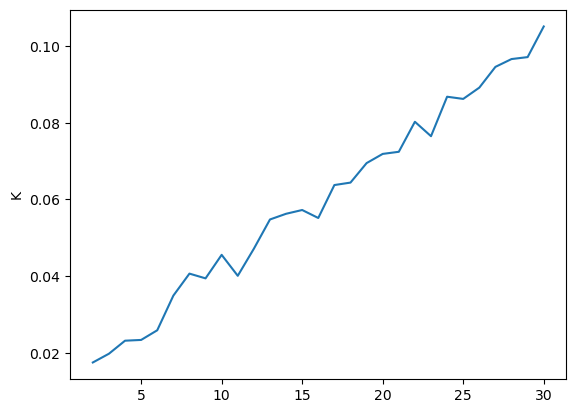

In [35]:
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')
plt.ylabel('K')
plt.show()

In [36]:
def sort_by_value(group):
    return group.sort_values(by='cluster')  # Sort by 'value' column

# Apply the sorting function to each group
sorted_df = df.groupby('cluster').apply(sort_by_value)

sorted_df.to_csv(f'clustered_and_sorted.csv', index=False)

In [37]:
sorted_df

Link  \
cluster                                                          
0       9    https://www.herald.co.zw/heritage-based-educat...   
        36   https://www.herald.co.zw/chioma-umeala-pushes-...   
        38   https://www.herald.co.zw/wake-up-work-hard-mak...   
        39   https://www.herald.co.zw/miss-teen-usa-srivast...   
        69   https://www.herald.co.zw/heritage-based-educat...   
...                                                        ...   
19      158  https://www.newsday.co.zw/sport/article/200026...   
        160  https://www.newsday.co.zw/sport/article/200026...   
        167  https://www.newsday.co.zw/sport/article/200026...   
        169  https://www.newsday.co.zw/sport/article/200026...   
        171  https://www.newsday.co.zw/sport/article/200026...   

                                                         Title  \
cluster                                                          
0       9    Heritage-based education pays off for Anglican...   
        36    Chioma Umeala pushes for more diversity in animé   
        38    ‘Wake up, work hard, make your dreams a reality’   
        39         Miss Teen USA Srivastava relinquishes title   
        69   Heritage-based education pays off for Anglican...   
...                                                        ...   
19      158  \n                     PSL comes down hard on ...   
        160  \n                     PSL imposes fine on Cap...   
        167  \n                     Brito wants Warriors jo...   
        169  \n                     Zifa take Warriors to J...   
        171  \n                     Lack of incentives snif...   

                                                       Content  cluster  
cluster                                                                  
0       9    Conrad Mupesa Mashonaland West Bureau WITH Gov...        0  
        36   Masego Seemela-Youth Interactive Correspondent...        0  
        38   Primrose Chibharo-Harare High School student F...        0  
        39   UmaSofia Srivastava, who took home the 2023 ti...        0  
        69   Conrad Mupesa Mashonaland West Bureau WITH Gov...        0  
...                                                        ...      ...  
19      158  THE Premier Soccer League (PSL) has descended ...       19  
        160  The Premier Soccer League Disciplinary committ...       19  
        167  PORTUGUESE national Baltemar Brito has unfinis...       19  
        169  THE Warriors will “host” Lesotho in South Afri...       19  
        171  THE Zimbabwe Rugby Union (ZRU) shot themselves...       19  

[280 rows x 4 columns]

In [38]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 usa
 life
 school
 education
 dream
 miss
 learners
 work
 naming
 animé
------------
Cluster 1:
 runs
 raza
 bennett
 bangladesh
 chevrons
 overs
 wicket
 campbell
 series
 wickets
------------
Cluster 2:
 boxing
 president
 mining
 said
 city
 tourism
 government
 mnangagwa
 country
 sector
------------
Cluster 3:
 herentals
 dynamos
 mangombe
 goal
 benza
 match
 emmanuel
 telone
 pirates
 points
------------
Cluster 4:
 foreign
 investors
 bank
 depositors
 vfex
 msci
 egypt
 passports
 capital
 nickel
------------
Cluster 5:
 sugar
 million
 pasta
 said
 wheat
 country
 zimbabwe
 import
 production
 farmers
------------
Cluster 6:
 golf
 vincent
 par
 hollick
 open
 scott
 fbc
 golfers
 zimbabwean
 course
------------
Cluster 7:
 zig
 currency
 ecocash
 econet
 government
 transactions
 exchange
 money
 foreign
 binance
------------
Cluster 8:
 billion
 group
 percent
 zwl
 insurance
 year
 million
 period
 growth
 business
------------
Cluster 9:


IndexError: index 20 is out of bounds for axis 0 with size 20

In [39]:
## Save the model
import pickle

# Save the trained KMeans model
with open('kmeans_model.pickle', 'wb') as f:
    pickle.dump(model, f)